In [31]:
#Fazendo a leitura dos dados
import random
random.seed(42) # define the seed (important to reproduce the results)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_set_path = 'C:\\Users\\mlsob\\Developer\\Notebooks\\credit-risk-predict\\dataset\\credit-risk\\'

train = pd.read_csv(data_set_path+'train.csv', header=(0))
test = pd.read_csv(data_set_path+'test.csv', header=(0))

print("Número de linhas e colunas no conjunto de treinamento:", train.shape)
print("Número de linhas e colunas no conjunto de teste:", test.shape)
attributes = list(train.columns)
train.head(10)

Número de linhas e colunas no conjunto de treinamento: (614, 13)
Número de linhas e colunas no conjunto de teste: (367, 12)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [32]:
#Exclusão de atributo não relevante "Loan_ID" nos conjuntos de treino e teste
train.drop(['Loan_ID'],axis = 1, inplace = True)
train.head(10)
#print(train.shape)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [33]:
#import label enconding
from sklearn import preprocessing


label_enconder = preprocessing.LabelEncoder()

train['Loan_Status'] = label_enconder.fit_transform(train['Loan_Status'])
#print(train['Loan_Status'])
train.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1
6,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,1
7,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,0
8,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,1
9,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,0


In [34]:
#Exclusão de atributo não relevante "Loan_ID" nos conjuntos de teste
Loan_ID_test = test['Loan_ID']
test.drop(['Loan_ID'],axis = 1, inplace = True)
test.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
6,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban
7,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural
8,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban
9,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban


In [35]:
#Transformação de atributos categóricos em numéricos com One-ho-enconding para o conjunto de treino 
train.head(10)
train = pd.get_dummies(train)
train.head(10)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,NaN,360.0,1.0,1,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,0,0,1,0,1,...,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,1,0,1,0,1,...,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,1,0,1,0,1,...,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,1,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1
5,5417,4196.0,267.0,360.0,1.0,1,0,1,0,1,...,0,1,0,1,0,0,1,0,0,1
6,2333,1516.0,95.0,360.0,1.0,1,0,1,0,1,...,0,0,0,0,1,1,0,0,0,1
7,3036,2504.0,158.0,360.0,0.0,0,0,1,0,1,...,0,0,1,1,0,1,0,0,1,0
8,4006,1526.0,168.0,360.0,1.0,1,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1
9,12841,10968.0,349.0,360.0,1.0,0,0,1,0,1,...,1,0,0,1,0,1,0,0,1,0


In [36]:
#Transformação de atributos categóricos em numéricos com One-ho-enconding para o conjunto de teste
test = pd.get_dummies(test)
test.head(10)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,110.0,360.0,1.0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
1,3076,1500,126.0,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
2,5000,1800,208.0,360.0,1.0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
3,2340,2546,100.0,360.0,NaN,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
4,3276,0,78.0,360.0,1.0,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1
5,2165,3422,152.0,360.0,1.0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1
6,2226,0,59.0,360.0,1.0,1,0,1,0,0,1,0,0,0,1,1,0,0,1,0
7,3881,0,147.0,360.0,0.0,0,1,0,1,0,0,1,0,0,1,1,0,1,0,0
8,13633,0,280.0,240.0,1.0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1
9,2400,2400,123.0,360.0,1.0,0,1,1,0,1,0,0,0,0,1,1,0,0,1,0


In [37]:
#Identificação de valores nulos (not a number: nan), no conjunto de treino, com pandas
train.isnull().sum().sort_values(ascending=False).head(10)



Credit_History             50
LoanAmount                 22
Loan_Amount_Term           14
ApplicantIncome             0
Dependents_2                0
Property_Area_Semiurban     0
Property_Area_Rural         0
Self_Employed_Yes           0
Self_Employed_No            0
Education_Not Graduate      0
dtype: int64

In [38]:
#Identificação de valores nulos (not a number: nan), no conjunto de teste, com pandas
test.isnull().sum().sort_values(ascending=False).head(10)

Credit_History             29
Loan_Amount_Term            6
LoanAmount                  5
ApplicantIncome             0
Dependents_3+               0
Property_Area_Semiurban     0
Property_Area_Rural         0
Self_Employed_Yes           0
Self_Employed_No            0
Education_Not Graduate      0
dtype: int64

In [39]:
#Substituição de valores faltantes em cada instância no conjuntos de treino e teste por valores válidos (moda, média etc)
train['Credit_History'] = train['Credit_History'].fillna(train['Credit_History'].mode()[0])
train['LoanAmount'] = train['LoanAmount'].fillna(train['LoanAmount'].mode()[0])
train['Loan_Amount_Term'] = train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0])

test['Credit_History'] = test['Credit_History'].fillna(test['Credit_History'].mode()[0])
test['LoanAmount'] = test['LoanAmount'].fillna(test['LoanAmount'].mode()[0])
test['Loan_Amount_Term'] = test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0])

In [40]:
train.isnull().sum().sort_values(ascending=False).head(10)

ApplicantIncome            0
Dependents_1               0
Property_Area_Semiurban    0
Property_Area_Rural        0
Self_Employed_Yes          0
Self_Employed_No           0
Education_Not Graduate     0
Education_Graduate         0
Dependents_3+              0
Dependents_2               0
dtype: int64

In [41]:
test.isnull().sum().sort_values(ascending=False).head(10)

ApplicantIncome            0
CoapplicantIncome          0
Property_Area_Semiurban    0
Property_Area_Rural        0
Self_Employed_Yes          0
Self_Employed_No           0
Education_Not Graduate     0
Education_Graduate         0
Dependents_3+              0
Dependents_2               0
dtype: int64

In [55]:
data_train = train.to_numpy()
print(data_train.shape)
nrow,ncol = data_train.shape
print(nrow)
print(ncol)
y = data_train[:,5]
X = data_train[:,0:ncol-1]
print(X)
print(y)

(614, 21)
614
21
[[5.849e+03 0.000e+00 1.200e+02 ... 0.000e+00 0.000e+00 0.000e+00]
 [4.583e+03 1.508e+03 1.280e+02 ... 0.000e+00 1.000e+00 0.000e+00]
 [3.000e+03 0.000e+00 6.600e+01 ... 1.000e+00 0.000e+00 0.000e+00]
 ...
 [8.072e+03 2.400e+02 2.530e+02 ... 0.000e+00 0.000e+00 0.000e+00]
 [7.583e+03 0.000e+00 1.870e+02 ... 0.000e+00 0.000e+00 0.000e+00]
 [4.583e+03 0.000e+00 1.330e+02 ... 1.000e+00 0.000e+00 1.000e+00]]
[1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0.
 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1.
 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1.
 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 

In [51]:
#converção dos dados para o formato numpy para facilitar tarefas de classificação e regressão
#Para o conjunto de treino
data_train = train.to_numpy()
print(data_train.shape)
nrow,ncol = data_train.shape
y = data_train[:,-1]
X = data_train[:,0:ncol-1]
print(y)
print(X)

(614, 21)
[1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0.
 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0.
 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.
 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0

In [56]:
#Para o conjunto de teste
data_test = test.to_numpy()
X_test = data_test

In [67]:
#Normalizados, de modo a evitar o efeito da escala dos atributos nos métodos de aprendizado
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

X_test = scaler.transform(X_test)

print('Dados transformados:')
print('Media: ', np.mean(X, axis = 0))
print('Desvio Padrao:', np.std(X, axis = 0))

Dados transformados:
Media:  [-5.78617863e-18  2.89308931e-18  2.89308931e-18  1.30189019e-17
 -5.78617863e-17 -3.61636164e-18  0.00000000e+00 -5.20756077e-17
  4.91825184e-17  1.15723573e-17 -2.31447145e-17 -1.44654466e-17
 -4.62894290e-17 -5.20756077e-17 -1.73585359e-17  1.73585359e-17
 -1.44654466e-17 -2.60378038e-17  1.15723573e-17  0.00000000e+00]
Desvio Padrao: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


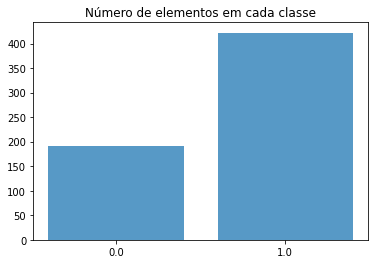

In [61]:
#Verificando o banlanceamento das classes
#classes = train[train.columns[0]]
classes = y
cl = np.unique(classes)
ncl = np.zeros(len(cl))
for i in np.arange(0, len(cl)):
    a = classes == cl[i]
    ncl[i] = len(classes[a])
    
numbers = np.arange(0, len(cl))
plt.bar(numbers, ncl,  alpha=.75)
plt.xticks(numbers, cl)
plt.title('Número de elementos em cada classe')
plt.show(True)

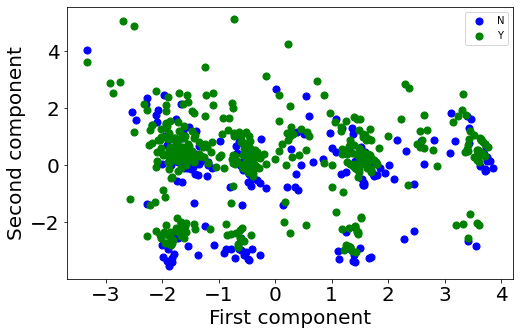

In [68]:
#Análise descritiva dos dados - Uso da técnica de PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

classes = np.unique(y)

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
aux = 0
plt.figure(figsize=(8,5))
for c in classes:
    if c == 1:
        lb = 'Y'
    else:
        lb = 'N'
    nodes = np.where(y == c)
    plt.scatter(pca_result[nodes,0], pca_result[nodes,1], s=50, color = colors[aux], label = lb)
    aux = aux + 1
plt.legend()
plt.xlabel("First component", fontsize=20)
plt.ylabel("Second component", fontsize=20)
plt.xticks(color='k', size=20)
plt.yticks(color='k', size=20)
plt.show(True)

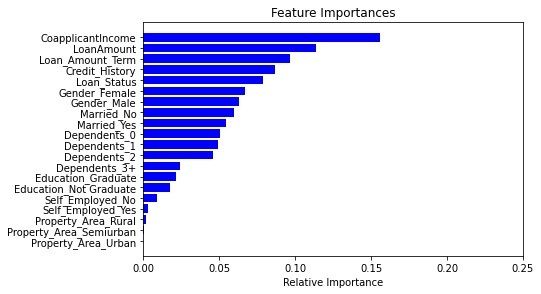

In [73]:
pca = PCA()
pca_result = pca.fit_transform(X)
var_exp = pca.explained_variance_ratio_

importances = var_exp
attributes = train.columns[1:len(train.columns)]
indices = np.argsort(importances)
attributes_rank = []
for i in indices:
    attributes_rank.append(attributes[i])
plt.title('Feature Importances')
plt.tight_layout()
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), attributes_rank, fontsize=10)
plt.xlabel('Relative Importance',fontsize=10)
plt.xticks(color='k', size=10)
plt.yticks(color='k', size=10)
plt.xlim([0.0, 0.25])
plt.show()

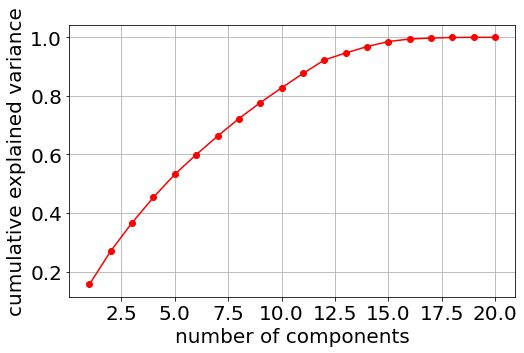

In [74]:
pca = PCA().fit(X)
plt.figure(figsize=(8,5))
ncomp = np.arange(1, np.shape(X)[1]+1)
plt.plot(ncomp, np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('number of components', fontsize=20)
plt.ylabel('cumulative explained variance', fontsize=20);
plt.xticks(color='k', size=20)
plt.yticks(color='k', size=20)
plt.grid(True)
plt.show(True)

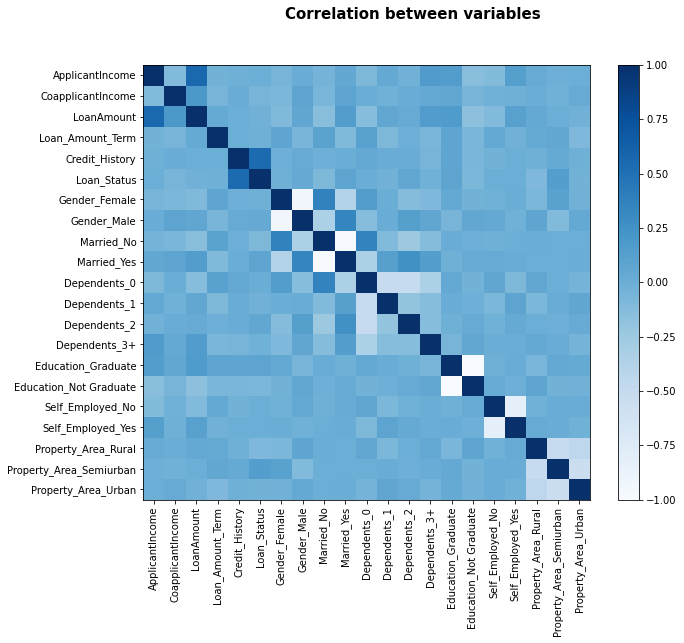

In [75]:
corr = train.corr()
#Plot Correlation Matrix using Matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(corr, cmap='Blues', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr)), corr.columns);
plt.suptitle('Correlation between variables', fontsize=15, fontweight='bold')
plt.grid(False)
plt.show()

Melhor k: 2  AUC: 0.915639680596841


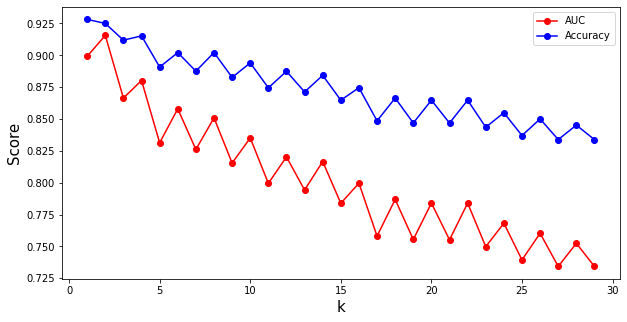

In [76]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
#cv = KFold(n_splits=10)
# enumerate the splits and summarize the distributions
mauc = []
macc = []
vk = []
for k in range(1, 30):
    vauc = []
    vacc = []
    for train_index, test_index in cv.split(X, y):
        # select rows
        x_train, x_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
        model.fit(x_train,y_train)
        y_pred = model.predict(x_test) 
        score = accuracy_score(y_pred, y_test)

        vauc.append(roc_auc_score(y_test, y_pred))
        vacc.append(accuracy_score(y_pred, y_test))
    macc.append(np.mean(vacc))
    mauc.append(np.mean(vauc))
    vk.append(k)
    #print('k:', k)
    #print('Average accuracy:', np.mean(vacc))
    #print('Average AUC:', np.mean(vauc))
best_k = np.argmax(mauc)+1
print('Melhor k:', best_k, ' AUC:',mauc[best_k-1])
plt.figure(figsize=(10,5))
plt.plot(vk, mauc, '-ro', label= 'AUC')
plt.plot(vk, macc, '-bo', label = 'Accuracy')
plt.xlabel('k', fontsize = 15)
plt.ylabel('Score', fontsize = 15)
plt.legend()
plt.show()